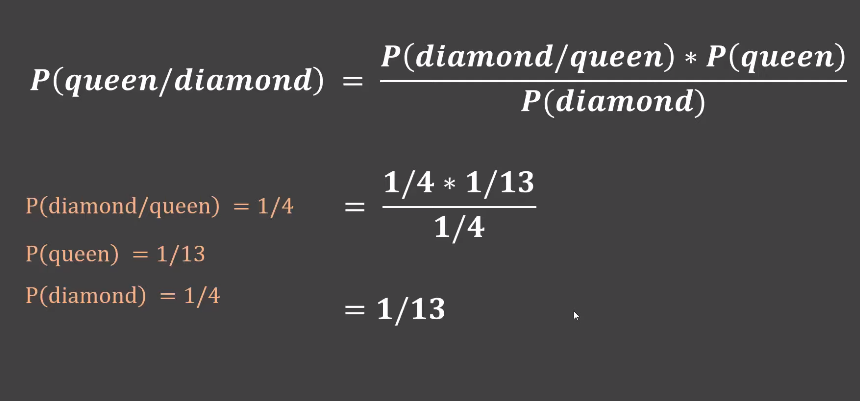
#### here by the data of titanic with the help of niave we find the survived 
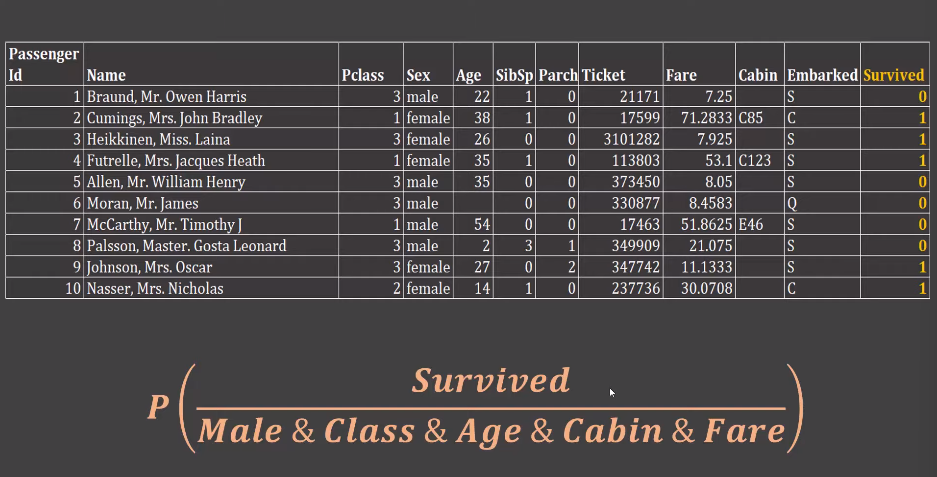
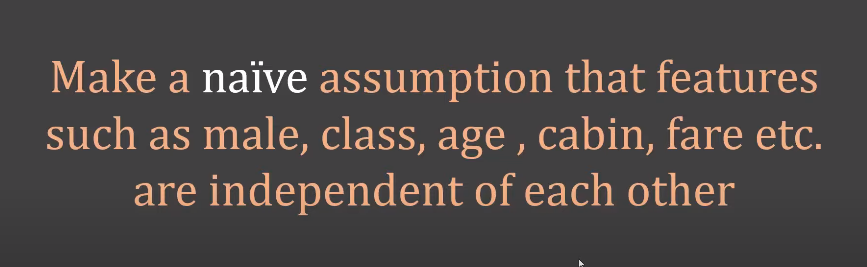
##### naive used in spam detection, wheather forcasting,face detection 

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.drop(['Name','Ticket','Cabin','SibSp','Parch','PassengerId','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [3]:
target=df.Survived
inputs=df.drop('Survived',axis='columns')

In [4]:
dumies=pd.get_dummies(inputs.Sex)
dumies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [5]:
inputs=pd.concat([inputs,dumies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [6]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [7]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [8]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [12]:
inputs[inputs.Age.isna()]

,Pclass,Age,Fare,female,male
5,3,NaN,8.4583,0,1
17,2,NaN,13.0000,0,1
19,3,NaN,7.2250,1,0
26,3,NaN,7.2250,0,1
28,3,NaN,7.8792,1,0
...,...,...,...,...,...
859,3,NaN,7.2292,0,1
863,3,NaN,69.5500,1,0
868,3,NaN,9.5000,0,1
878,3,NaN,7.8958,0,1


In [13]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [68]:
len(x_train)

712

In [69]:
len(x_test)

179

### cuple of bayes form like (gaussian,Bernoulli,Multinomial) naive etc. when ur data distribution is noraml(bell curve)

In [70]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [71]:
model.fit(x_train,y_train)

GaussianNB()

In [72]:
model.score(x_test,y_test)

0.776536312849162

In [73]:
x_test[:10]

,Pclass,Age,Fare,female,male
521,3,22.000000,7.8958,0,1
378,3,20.000000,4.0125,0,1
268,1,58.000000,153.4625,1,0
476,2,34.000000,21.0000,0,1
692,3,29.699118,56.4958,0,1
616,3,34.000000,14.4000,0,1
711,1,29.699118,26.5500,0,1
540,1,36.000000,71.0000,1,0
223,3,29.699118,7.8958,0,1
697,3,29.699118,7.7333,1,0


In [74]:
y_test[:10]

521    0
378    0
268    1
476    0
692    1
616    0
711    0
540    1
223    0
697    1
Name: Survived, dtype: int64

In [75]:
model.predict(x_test[:10])

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [77]:
model.predict_proba(x_test[:10])

array([[9.89656156e-01, 1.03438444e-02],
       [9.88909641e-01, 1.10903588e-02],
       [6.01932211e-07, 9.99999398e-01],
       [9.79233907e-01, 2.07660934e-02],
       [9.79382942e-01, 2.06170577e-02],
       [9.91219835e-01, 8.78016519e-03],
       [9.16496350e-01, 8.35036502e-02],
       [1.50962087e-03, 9.98490379e-01],
       [9.90705348e-01, 9.29465166e-03],
       [5.60592693e-02, 9.43940731e-01]])

# topic 2 spam email detection

In [78]:
df=pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [79]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [80]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.25)

#### here we have Messages column in string and we have to convert it in no. so we use count vectorizer
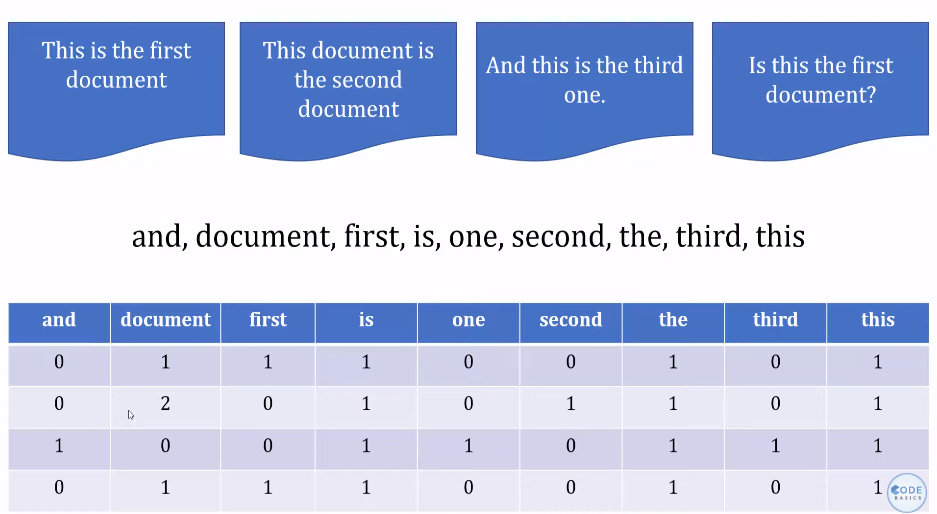
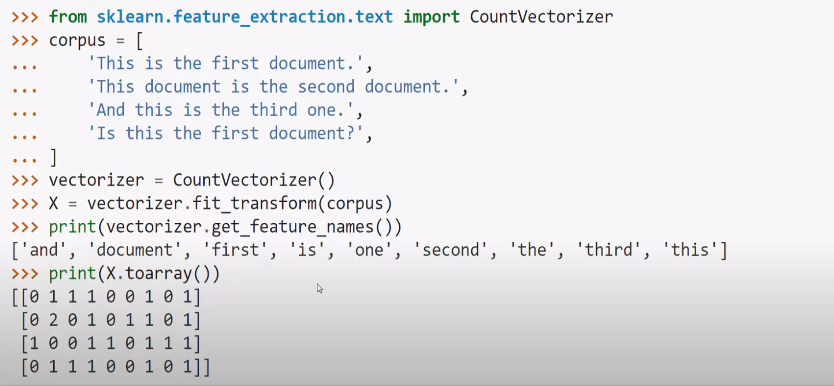

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)
x_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

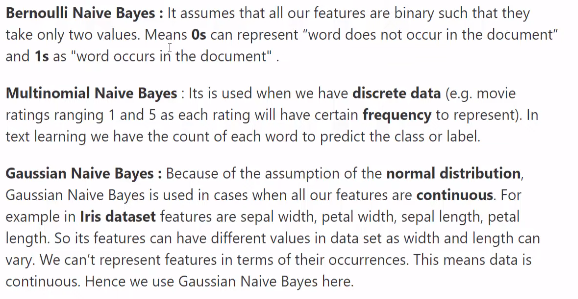

In [85]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [86]:
emails=[
    'Hey mohan,can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [87]:
x_test_count=v.transform(x_test)
model.score(x_test_count,y_test)

0.9856424982053122

## another mehtod to do naive bayes

In [88]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [89]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [92]:
emails=[
    'Hey mohan,can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
clf.predict(emails)

array([0, 1], dtype=int64)

In [91]:
clf.score(x_test,y_test)

0.9856424982053122

# Exercise

In [103]:
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline  # no use bcoz no string
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
wine=load_wine()

In [104]:
df=pd.DataFrame(wine.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [105]:
target=wine.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [106]:
df['target']=target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [107]:
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.2)

In [108]:
model1=GaussianNB()
model2=MultinomialNB()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

MultinomialNB()

In [109]:
model1.score(x_test,y_test)

0.9722222222222222

In [110]:
model2.score(x_test,y_test)

0.75